
## **Problem Statement:**  

Develop a predictive model  to forecast the next day's stock market closing price based on historical data, including open, high, low, volume, and adjusted close price to aid in informed decision-making. The following steps has to be performed for a complete analysis and evaluation.


DIFFERNT MODELS:

1. Hybrid Model: A combination of LSTM and Linear Regression. 
 
2. Advanced Hybrid Model: A combination of Linear Regression, LSTM, SVR, and Random Forest.
  
3. Voting Regressor: An ensemble approach integrating the models from the second step.  


FEATURE ENGINEERING/FEATURE SELECTION:

Each model is evaluated using three different feature selection strategies:  

- Approach 1: Using Open, High, Low, Volume, and Adjusted Close as independent features.
  
- Approach 2: Using Open, High, and Low as independent features.
  
- Approach 3: Using Close as both the dependent and independent variable.  


List down nine different values of MAE, RMSE and R2 values, and conclude, which combination of feature and algorithm gives the best accuracy among all combinations.

### PREPROCESSING

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load data
data=pd.read_csv('apple_stock_data.csv')

In [4]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


In [5]:
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       252 non-null    datetime64[ns, UTC]
 1   Adj Close  252 non-null    float64            
 2   Close      252 non-null    float64            
 3   High       252 non-null    float64            
 4   Low        252 non-null    float64            
 5   Open       252 non-null    float64            
 6   Volume     252 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 13.9 KB


In [9]:
data.set_index('Date',inplace=True)

<Axes: >

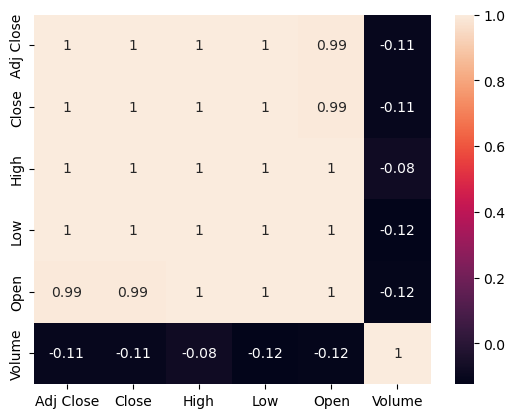

In [10]:
cor=data.corr()
sns.heatmap(cor,annot=True)

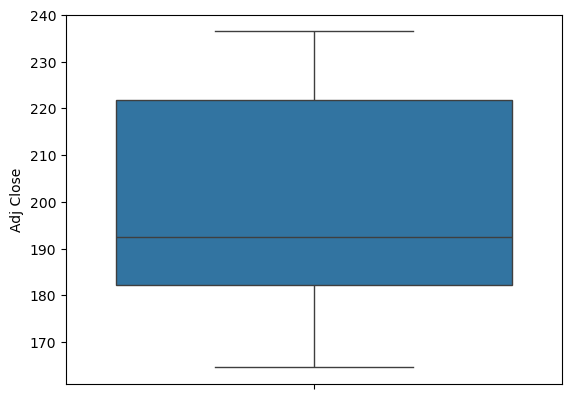

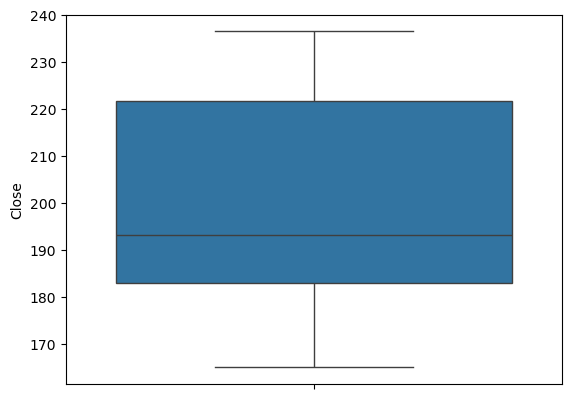

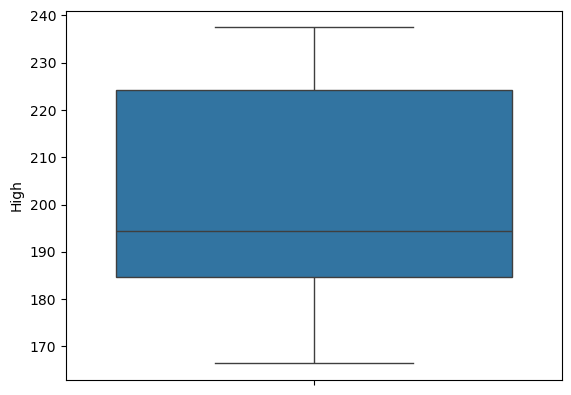

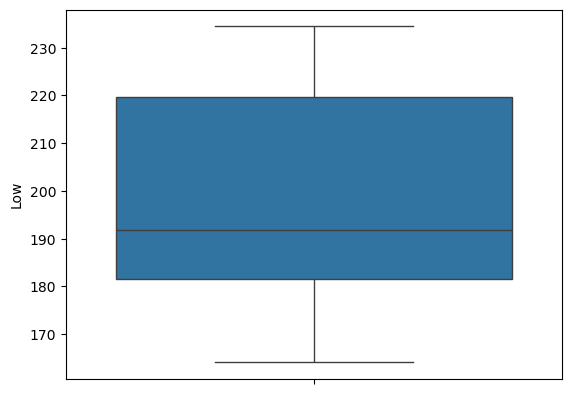

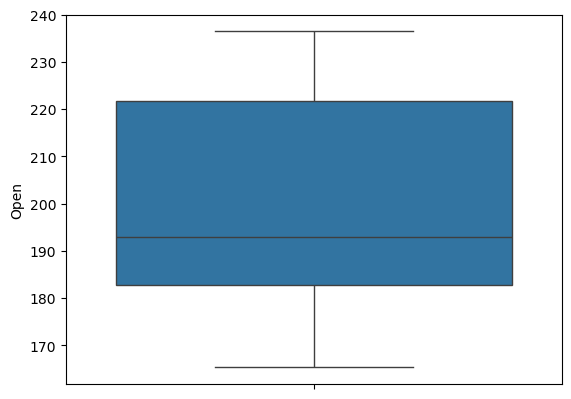

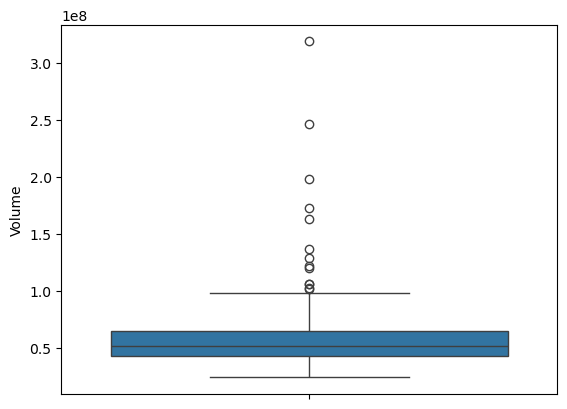

In [11]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

in stock market the volume can not be considered as a outlier, it is considered as an anomaly

In [12]:
# scale the dataframe
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=pd.DataFrame(scaler.fit_transform(data),columns=data.columns,index=data.index)

In [13]:
df

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-02 00:00:00+00:00,0.168025,0.175853,0.160079,0.161717,0.142978,0.180858
2023-11-03 00:00:00+00:00,0.155294,0.162983,0.146575,0.131732,0.124982,0.189102
2023-11-06 00:00:00+00:00,0.190997,0.199077,0.183289,0.172375,0.155068,0.135060
2023-11-07 00:00:00+00:00,0.226839,0.235311,0.225630,0.211596,0.194433,0.157762
2023-11-08 00:00:00+00:00,0.241646,0.250280,0.239837,0.248828,0.238999,0.085843
...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,0.957159,0.956911,0.961176,0.973000,0.955574,0.040861
2024-10-29 00:00:00+00:00,0.960915,0.960688,0.955549,0.969732,0.952482,0.038587
2024-10-30 00:00:00+00:00,0.911258,0.910744,0.943452,0.930368,0.945593,0.078140


### **HYBRID MODEL (LSTM+LR)**

### APPROACH-1

**LINEAR REGRESSION**

In [14]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

#define dependent and independent features
x=df.drop(columns='Close')
y=df[['Close']]

#split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

#initial modelling
model_lr11=LinearRegression()
model_lr11.fit(x_train,y_train)
y_pred_lr11=model_lr11.predict(x_test)

#evaluation metrics for linear regression model with all features as predictors
rmse_lr11=root_mean_squared_error(y_test,y_pred_lr11)
mae_lr11=mean_absolute_error(y_test,y_pred_lr11)
r2_lr11=r2_score(y_test,y_pred_lr11)
print(f'RMSE:{rmse_lr11}\nMAE:{mae_lr11}\nR2:{r2_lr11}')

RMSE:0.002739926804601375
MAE:0.002459694742372806
R2:0.9999039580218739


In [15]:
x_train

,Adj Close,High,Low,Open,Volume
Date,,,,,
2024-05-20 00:00:00+00:00,0.364886,0.358982,0.354270,0.337129,0.068944
2024-01-24 00:00:00+00:00,0.405858,0.421719,0.430013,0.422747,0.100407
2024-08-27 00:00:00+00:00,0.882466,0.878464,0.864147,0.852664,0.040343
2024-09-13 00:00:00+00:00,0.805547,0.810803,0.821799,0.818642,0.043167
2024-06-05 00:00:00+00:00,0.431991,0.429034,0.437544,0.422466,0.102190
...,...,...,...,...,...
2024-04-08 00:00:00+00:00,0.047867,0.039387,0.059116,0.051736,0.045403
2023-11-22 00:00:00+00:00,0.361655,0.373189,0.380134,0.367496,0.052844
2024-03-18 00:00:00+00:00,0.120985,0.159094,0.134148,0.143681,0.174984


In [1]:
# scaler_close=MinMaxScaler()
# Close_new=scaler_close.fit(data[["Close"]])

# y_pred_true=scaler_close.inverse_transform(y_pred_lr11).reshape(-1)



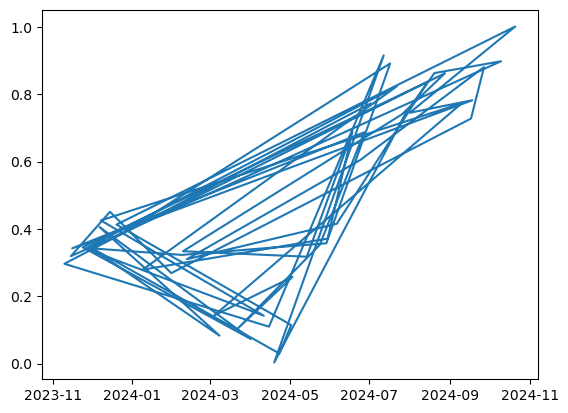

In [ ]:
# plt.plot(x_test.index.date,y_pred_lr11)

**LSTM**

In [19]:
print(x.shape)
print(y.shape)

(252, 5)
(252, 1)


In [20]:
def create_sequences(features, target, time_steps=60):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i+time_steps])  
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
x_array=x.to_numpy()
y_array=y.to_numpy()
X, y = create_sequences(x_array, y_array, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [21]:
print(X_train.shape)
print(x_test.shape)

(153, 60, 5)
(51, 5)


In [22]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model_lstm11 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
   
    LSTM(units=50),
    Dense(units=30),
    
    Dense(units=1)  # Output layer (Predicting Close price)
])

model_lstm11.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model_lstm11.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - loss: 0.1147 - val_loss: 0.0075
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0232 - val_loss: 0.0752
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0226 - val_loss: 0.0061
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0147 - val_loss: 0.0067
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0125 - val_loss: 0.0072
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0099 - val_loss: 0.0056
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0101 - val_loss: 0.0076
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0092 - val_loss: 0.0041
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0083 - val_loss: 0.0041
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0087 - val_loss: 0.0087


In [24]:
y_pred_lstm11 = model_lstm11.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


In [25]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error,r2_score

mae_lstm11 = mean_absolute_error(y_test, y_pred_lstm11)
rmse_lstm11 = root_mean_squared_error(y_test, y_pred_lstm11)
r2_lstm11=r2_score(y_test,y_pred_lstm11)
print(f"MAE_LSTM11: {mae_lstm11:.2f}, RMSE_LSTM11: {rmse_lstm11:.2f}, R2_LSTM11: {r2_lstm11:.2f}")


MAE_LSTM11: 0.05, RMSE_LSTM11: 0.06, R2_LSTM11: 0.21


**HYBRID**

In [ ]:
# Reshape Linear Regression predictions to match LSTM predictions
y_pred_lr11 = y_pred_lr11[-len(y_pred_lstm11):]  # Ensure equal length

# Convert to NumPy arrays
y_pred_lr11 = np.array(y_pred_lr11)
y_pred_lstm11 = np.array(y_pred_lstm11)

# Hybrid Prediction: Weighted Average of Linear Regression & LSTM
alpha = 0.6  # Weight for LSTM (Adjustable)
y_pred_h11 = alpha * y_pred_lstm11 + (1 - alpha) * y_pred_lr11


In [27]:
y_pred_lstm11

array([[0.8694738 ],
       [0.8664523 ],
       [0.86285996],
       [0.8592843 ],
       [0.85618854],
       [0.8518454 ],
       [0.84624636],
       [0.8407903 ],
       [0.8378649 ],
       [0.8399368 ],
       [0.8446343 ],
       [0.85144854],
       [0.858811  ],
       [0.8662554 ],
       [0.8735055 ],
       [0.8810902 ],
       [0.88768196],
       [0.89257807],
       [0.89570767],
       [0.8976192 ],
       [0.8977368 ],
       [0.8966824 ],
       [0.89536506],
       [0.8942659 ],
       [0.89353305],
       [0.8936088 ],
       [0.89565104],
       [0.8984353 ],
       [0.90191305],
       [0.90657824],
       [0.9120269 ],
       [0.91764075],
       [0.92256725],
       [0.92615974],
       [0.92877334],
       [0.93112934],
       [0.93323755],
       [0.93478084],
       [0.9350584 ]], dtype=float32)

In [22]:
y_test.shape
y_pred_h11.shape

(39, 1)

In [23]:
# # Reverse scaling to original stock prices
# y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_pred_hybrid_actual = scaler.inverse_transform(y_pred_hybrid)

# Evaluation Metrics
mae_h11 = mean_absolute_error(y_test, y_pred_h11)
rmse_h11 = root_mean_squared_error(y_test, y_pred_h11)
r2_h11 = r2_score(y_test, y_pred_h11)

print(f"MAE_H11: {mae_h11:.2f}, RMSE_H11: {rmse_h11:.2f}, R2_H11: {r2_h11:.4f}")

MAE_H11: 0.19, RMSE_H11: 0.21, R2_H11: -8.5120


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-02 00:00:00+00:00,0.168025,0.175853,0.160079,0.161717,0.142978,0.180858
2023-11-03 00:00:00+00:00,0.155294,0.162983,0.146575,0.131732,0.124982,0.189102
2023-11-06 00:00:00+00:00,0.190997,0.199077,0.183289,0.172375,0.155068,0.135060
2023-11-07 00:00:00+00:00,0.226839,0.235311,0.225630,0.211596,0.194433,0.157762
2023-11-08 00:00:00+00:00,0.241646,0.250280,0.239837,0.248828,0.238999,0.085843
...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,0.957159,0.956911,0.961176,0.973000,0.955574,0.040861
2024-10-29 00:00:00+00:00,0.960915,0.960688,0.955549,0.969732,0.952482,0.038587
2024-10-30 00:00:00+00:00,0.911258,0.910744,0.943452,0.930368,0.945593,0.078140


### APPROACH 2

**LINEAR REGRESSION**

In [24]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [25]:
x=df[['Open','High','Low']]
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

model_lr12=LinearRegression()
model_lr12.fit(x_train,y_train)
y_pred_lr12=model_lr12.predict(x_test)

mae_lr12=mean_absolute_error(y_test,y_pred_lr12)
rmse_lr12=root_mean_squared_error(y_test,y_pred_lr12)
r2_lr12=r2_score(y_test,y_pred_lr12)
print(f"RMSE_LR12:{rmse_lr12}\nMAE_LR12:{mae_lr12}\nR2_LR12:{r2_lr12}")

RMSE_LR12:0.012423550636731801
MAE_LR12:0.010099101693279254
R2_LR12:0.9980254204122807


In [26]:
#LSTM
def create_sequences(features, target, time_steps=60):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i+time_steps])  
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
x_array=x.to_numpy()
y_array=y.to_numpy()
X, y = create_sequences(x_array, y_array, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model_lstm12 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
   
    LSTM(units=50),
    Dense(units=30),
    
    Dense(units=1)  # Output layer (Predicting Close price)
])

model_lstm12.compile(optimizer='adam', loss='mean_squared_error')


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model_lstm12.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))
y_pred_lstm12=model_lstm12.predict(X_test)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.1926 - val_loss: 0.0324
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0355 - val_loss: 0.0503
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0263 - val_loss: 0.0202
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0139 - val_loss: 0.0081
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0133 - val_loss: 0.0140
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0128 - val_loss: 0.0043
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0105 - val_loss: 0.0043
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0102 - val_loss: 0.0047
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0096 - val_loss: 0.0049
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0095 - val_loss: 0.0049
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0089 - val_loss: 0.0047
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0087 - val_loss: 0.0049


In [29]:

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae_lstm12 = mean_absolute_error(y_test, y_pred_lstm12)
rmse_lstm12 = root_mean_squared_error(y_test, y_pred_lstm12)
r2_lstm12=r2_score(y_test,y_pred_lstm12)
print(f"MAE_LSTM12: {mae_lstm12:.2f}\nRMSE_LSTM12: {rmse_lstm12:.2f}\nR2_LSTM12: {r2_lstm12:.2f}")


MAE_LSTM12: 0.06
RMSE_LSTM12: 0.07
R2_LSTM12: 0.08


In [30]:
#hybrid
# Reshape Linear Regression predictions to match LSTM predictions
y_pred_lr12= y_pred_lr12[-len(y_pred_lstm12):]  # Ensure equal length

# Convert to NumPy arrays
y_pred_lr12 = np.array(y_pred_lr12)
y_pred_lstm = np.array(y_pred_lstm12)

# Hybrid Prediction: Weighted Average of Linear Regression & LSTM
alpha = 0.6  # Weight for LSTM (Adjustable)
y_pred_hybrid = alpha * y_pred_lstm + (1 - alpha) * y_pred_lr12


# Evaluation Metrics
mae_h12 = mean_absolute_error(y_test, y_pred_hybrid)
rmse_h12 = root_mean_squared_error(y_test, y_pred_hybrid)
r2_h12 = r2_score(y_test, y_pred_hybrid)

print(f"MAE_H12: {mae_h12}\nRMSE_H12: {rmse_h12}\nR2_H12: {r2_h12}")

MAE_H12: 0.19412037708135885
RMSE_H12: 0.22052284098585948
R2_H12: -9.377730284053273


### APPROACH-3

In [31]:
data=df[['Close']]
from warnings import filterwarnings
filterwarnings('ignore')

In [32]:
data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)

In [33]:
x=data[['Lag_1','Lag_2','Lag_3']]
y=df[['Close']]

<Axes: >

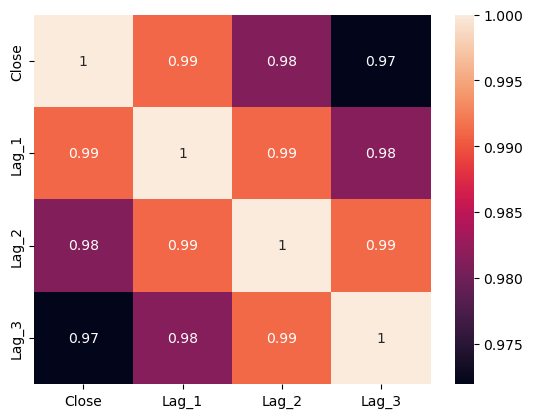

In [34]:
cor=data.corr()
sns.heatmap(cor,annot=True)

In [35]:
train_size=int(len(x)*0.8)
print(train_size)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]


199


In [36]:
x_test.shape

(50, 3)

In [37]:
from sklearn.linear_model import LinearRegression
model_lr13=LinearRegression()
model_lr13.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred_lr13=model_lr13.predict(x_test)


In [39]:
y_test=y_test[-len(x_test):]

In [40]:
y_test.shape

(50, 1)

In [41]:
y_pred_lr13.shape

(50, 1)

In [42]:
mae_lr13=mean_absolute_error(y_test,y_pred_lr13)
rmse_lr13=root_mean_squared_error(y_test,y_pred_lr13)
r2_lr13=r2_score(y_test,y_pred_lr13)

In [43]:
print(f'RMSE_LR13:{rmse_lr13}\nMAE_LR13:{mae_lr13}\nR2_LR13:{r2_lr13}')

RMSE_LR13:0.06631425026466722
MAE_LR13:0.050895335331548865
R2_LR13:-0.003622842156924655


**LSTM**

In [44]:
#Now prepare the data for LSTM by creating sequences of a defined length (e.g., 60 days) to predict the next day’s price:
def create_sequences(df, seq_length=60):
    X, y=[], []
    for i in range(len(df) - seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X), np.array(y)

seq_length=60
X,y=create_sequences(df['Close'].values,seq_length)

In [45]:
X.shape

(192, 60)

In [46]:
# split the sequences into training and test sets (eg, 80% training, 20% testing)
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model_lstm13=Sequential()
model_lstm13.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model_lstm13.add(LSTM(units=50))
model_lstm13.add(Dense(1))

In [48]:
#compile the model using an appropriate optimizer and loss function
model_lstm13.compile(optimizer='adam', loss='mean_squared_error')
model_lstm13.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2400
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0489
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0413
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0166
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0195
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0125
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0104
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0094
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0086
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0084
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0078
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0076
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

In [49]:
y_pred_lstm13=model_lstm13.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000271C3AA4E00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_pred_lstm13.shape)
print(y_test.shape)

(153, 60)
(153,)
(39, 60)
(39, 1)
(39,)


In [51]:
rmse_lstm13=root_mean_squared_error(y_test,y_pred_lstm13)
mae_lstm13=mean_absolute_error(y_test,y_pred_lstm13)
r2_lstm13=r2_score(y_test,y_pred_lstm13)

In [52]:
print(f'MSE_LSTM13:{rmse_lstm13}\nMAE_LSTM13:{mae_lstm13}\nR2_LSTM13:{r2_lstm13}')

MSE_LSTM13:0.0642038528849443
MAE_LSTM13:0.05295707181894437
R2_LSTM13:0.12033481610571573


**HYBRID**

In [53]:
y_pred_lr13=y_pred_lstm13[-len(y_pred_lstm13):]
alpha=0.6
hybrid13=alpha*y_pred_lstm13+(1-alpha)*y_pred_lr13

rmse_h13=root_mean_squared_error(y_test,hybrid13)
mae_h13=mean_absolute_error(y_test,hybrid13)
r2_h13=r2_score(y_test,hybrid13)

print(f'RMSE_H13:{rmse_h13}\nMAE_H13:{mae_h13}\nR2_H13:{r2_h13}')

RMSE_H13:0.06420384643376018
MAE_H13:0.05295706570564747
R2_H13:0.12033499288270155


### **HYBRID2(LSTM+LR+SVR+RF)**

### APPROACH1

In [54]:
#Linear regression
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#define dependent and independent features
x=df.drop(columns='Close')
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

model_lr21=LinearRegression()
model_lr21.fit(x_train,y_train)
y_pred_lr21=model_lr21.predict(x_test)

#evaluation metrics for linear regression model with all features as predictors
rmse_lr21=root_mean_squared_error(y_test,y_pred_lr21)
mae_lr21=mean_absolute_error(y_test,y_pred_lr21)
r2_lr21=r2_score(y_test,y_pred_lr21)
print(f'RMSE: {rmse_lr21}\n MAE: {mae_lr21} \n R2: {r2_lr21}')

RMSE: 0.002739926804601375
 MAE: 0.002459694742372806 
 R2: 0.9999039580218739


In [55]:
#LSTM
import tensorflow as tf
# tf.random.set_seed(42)
x=df.drop(columns='Close')
y=df[['Close']]
def create_sequences(features, target, time_steps=60):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i+time_steps])  
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
x_array=x.to_numpy()
y_array=y.to_numpy()
X, y = create_sequences(x_array,y_array, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model_lstm21 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
   
    LSTM(units=50),
    Dense(units=30),
    
    Dense(units=1)  # Output layer (Predicting Close price)
])

model_lstm21.compile(optimizer='adam', loss='mean_squared_error')
model_lstm21.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))
y_pred_lstm21=model_lstm21.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae_lstm21 = mean_absolute_error(y_test, y_pred_lstm21)
rmse_lstm21 = root_mean_squared_error(y_test, y_pred_lstm21)
r2_lstm21=r2_score(y_test,y_pred_lstm21)
print(f"\n\n\nMAE_LSTM21: {mae_lstm21:.2f}\n, RMSE_LSTM21: {rmse_lstm21:.2f}\n, R2_LSTM21: {r2_lstm21:.2f}")


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.2571 - val_loss: 0.0350
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0468 - val_loss: 0.0129
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0247 - val_loss: 0.0807
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0263 - val_loss: 0.0041
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0181 - val_loss: 0.0076
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0166 - val_loss: 0.0155
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0146 - val_loss: 0.0066
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0115 - val_loss: 0.0085
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0129 - val_loss: 0.0042
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0117 - val_loss: 0.0052
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0107 - val_loss: 0.0047
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0101 - val_loss: 0.0042


In [56]:
#SVR
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=df.drop(columns='Close')
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


model_svr21=SVR(kernel='rbf')
model_svr21.fit(x_train,y_train)
y_pred_svr21=model_svr21.predict(x_test)

rmse_svr21=root_mean_squared_error(y_test,y_pred_svr21)
mae_svr21=mean_absolute_error(y_test,y_pred_svr21)
r2_svr21=r2_score(y_test,y_pred_svr21)
print(f'RMSE_SVR21:{rmse_svr21}\nMAE_SVR21:{mae_svr21}\nR2_SVR21:{r2_svr21}')



RMSE_SVR21:0.05254948092659324
MAE_SVR21:0.04555405383007943
R2_SVR21:0.9646719199907317


In [57]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=df.drop(columns='Close')
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
model_rf21=RandomForestRegressor()
model_rf21.fit(x_train,y_train)
y_pred_rf21=model_rf21.predict(x_test)

rmse_rf21=root_mean_squared_error(y_test,y_pred_rf21)
mae_rf21=mean_absolute_error(y_test,y_pred_rf21)
r2_rf21=r2_score(y_test,y_pred_rf21)
print(f'RMSE_RF21:{rmse_rf21}\nMAE_RF21:{mae_rf21}\nR2_RF21:{r2_rf21}')

RMSE_RF21:0.007181963012115744
MAE_RF21:0.004780932027575636
R2_RF21:0.9993401131066185


In [58]:
#hybrid
# Reshape Linear Regression predictions to match LSTM predictions
y_pred_lr21 = y_pred_lr21[-len(y_pred_lstm21):]  # Ensure equal length
y_pred_svr21=y_pred_svr21[-len(y_pred_lstm21):]
y_pred_rf21=y_pred_rf21[-len(y_pred_lstm21):]
y_test=y_test[-len(y_pred_lstm21):]

# Convert to NumPy arrays
y_pred_lr21 = np.array(y_pred_lr21).reshape(-1,1)
y_pred_lstm21 = np.array(y_pred_lstm21).reshape(-1,1)
y_pred_svr21=np.array(y_pred_svr21).reshape(-1,1)
y_pred_rf21=np.array(y_pred_rf21).reshape(-1,1)
print(y_pred_rf21.shape)
print(y_pred_svr21.shape)
print(y_test.shape)
# Hybrid Prediction: Weighted Average of Linear Regression & LSTM
alpha = 0.25  # Weight for LSTM (Adjustable)
y_pred_h21 = 0.25 * y_pred_lstm21 + 0.25* y_pred_lr21+0.25*y_pred_svr21+0.25*y_pred_rf21

mae_h21=mean_absolute_error(y_test,y_pred_h21)
rmse_h21=root_mean_squared_error(y_test,y_pred_h21)
r2_h21=r2_score(y_test,y_pred_h21)
print(f"MAE_H21: {mae_h21:.2f}\nRMSE_H21: {rmse_h21:.2f}\nR2_H21: {r2_h21:.4f}")


(39, 1)
(39, 1)
(39, 1)
MAE_H21: 0.12
RMSE_H21: 0.13
R2_H21: 0.7544


### APPROACH-2

In [59]:
#linear regression
x=df[['Open','High','Low']]
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

model_lr22=LinearRegression()
model_lr22.fit(x_train,y_train)
y_pred_lr22=model_lr22.predict(x_test)

mae_lr22=mean_absolute_error(y_test,y_pred_lr22)
rmse_lr22=root_mean_squared_error(y_test,y_pred_lr22)
r2_lr22=r2_score(y_test,y_pred_lr22)
print(f"RMSE_LR22:{rmse_lr22}\nMAE_LR22:{mae_lr22}\nR2_LR22:{r2_lr22}")

RMSE_LR22:0.012423550636731801
MAE_LR22:0.010099101693279254
R2_LR22:0.9980254204122807


In [60]:
#LSTM
x=df[['Open','High','Low']]
y=df[['Close']]
def create_sequences(features, target, time_steps=60):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i+time_steps])
        y.append(target[i+time_steps])  
    return np.array(X), np.array(y)

time_steps = 60  # Use past 60 days for prediction
x_array=x.to_numpy()
y_array=y.to_numpy()
X, y = create_sequences(x_array, y_array, time_steps)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
model_lstm22 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
   
    LSTM(units=50),
    Dense(units=30),
    
    Dense(units=1)  # Output layer (Predicting Close price)
])

model_lstm22.compile(optimizer='adam', loss='mean_squared_error')

model_lstm22.fit(X_train, y_train, epochs=20, batch_size=30, validation_data=(X_test, y_test))
y_pred_lstm22=model_lstm22.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae_lstm22 = mean_absolute_error(y_test, y_pred_lstm22)
rmse_lstm22 = root_mean_squared_error(y_test, y_pred_lstm22)
r2_lstm22=r2_score(y_test,y_pred_lstm22)
print(f"MAE_LSTM22: {mae_lstm22:.2f}\nRMSE_LSTM22: {rmse_lstm22:.2f}\nR2_LSTM22: {r2_lstm22:.2f}")



Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.1696 - val_loss: 0.0620
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0410 - val_loss: 0.0669
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0314 - val_loss: 0.0148
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0146 - val_loss: 0.0064
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0136 - val_loss: 0.0149
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0140 - val_loss: 0.0042
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0113 - val_loss: 0.0042
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0108 - val_loss: 0.0043
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0111 - val_loss: 0.0044
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0101 - val_loss: 0.0045
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0096 - val_loss: 0.0052
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0092 - val_loss: 0.0047


In [61]:
#SVR

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=df.drop(columns=['Close','Volume','Adj Close'])
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


model_svr22=SVR(kernel='rbf')
model_svr22.fit(x_train,y_train)
y_pred_svr22=model_svr22.predict(x_test)

rmse_svr22=root_mean_squared_error(y_test,y_pred_svr22)
mae_svr22=mean_absolute_error(y_test,y_pred_svr22)
r2_svr22=r2_score(y_test,y_pred_svr22)
print(f'RMSE_SVR22:{rmse_svr22}\nMAE_SVR22:{mae_svr22}\nR2_SVR22:{r2_svr22}')



RMSE_SVR22:0.04899533432995199
MAE_SVR22:0.042890592712431785
R2_SVR22:0.9692890942425318


In [62]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
x=df.drop(columns=['Close','Volume','Adj Close'])
y=df[['Close']]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
model_rf22=RandomForestRegressor()
model_rf22.fit(x_train,y_train)
y_pred_rf22=model_rf22.predict(x_test)

rmse_rf22=root_mean_squared_error(y_test,y_pred_rf22)
mae_rf22=mean_absolute_error(y_test,y_pred_rf22)
r2_rf22=r2_score(y_test,y_pred_rf22)
print(f'RMSE_RF22:{rmse_rf22}\nMAE_RF22:{mae_rf22}\nR2_RF22:{r2_rf22}')

RMSE_RF22:0.01987182368406491
MAE_RF22:0.014094622839464626
R2_RF22:0.9949480548743149


In [63]:
#hybrid
# Reshape Linear Regression predictions to match LSTM predictions
y_pred_lr22 = y_pred_lr22[-len(y_pred_lstm22):]  # Ensure equal length
y_pred_svr22=y_pred_svr22[-len(y_pred_lstm22):]
y_pred_rf22=y_pred_rf22[-len(y_pred_lstm22):]
y_test=y_test[-len(y_pred_lstm22):]

# Convert to NumPy arrays
y_pred_lr22 = np.array(y_pred_lr22).reshape(-1,1)
y_pred_lstm22 = np.array(y_pred_lstm22).reshape(-1,1)
y_pred_svr22=np.array(y_pred_svr22).reshape(-1,1)
y_pred_rf22=np.array(y_pred_rf22).reshape(-1,1)
print(y_pred_rf22.shape)
print(y_pred_svr22.shape)
print(y_test.shape)

alpha = 0.25  
y_pred_h22 = 0.25 * y_pred_lstm22 + 0.25* y_pred_lr22+0.25*y_pred_svr22+0.25*y_pred_rf22

mae_h22=mean_absolute_error(y_test,y_pred_h22)
rmse_h22=root_mean_squared_error(y_test,y_pred_h22)
r2_h22=r2_score(y_test,y_pred_h22)
print(f"MAE_H22: {mae_h22:.2f}\nRMSE_H22: {rmse_h22:.2f}\nR2_H22: {r2_h22:.4f}")



(39, 1)
(39, 1)
(39, 1)
MAE_H22: 0.11
RMSE_H22: 0.13
R2_H22: 0.7557


### APPROACH 3

In [64]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
data=df[['Close']]
from warnings import filterwarnings
filterwarnings('ignore')


data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)


x=data[['Lag_1','Lag_2','Lag_3']]
y=data[['Close']]


train_size=int(len(y)*0.8)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]


model_lr23=LinearRegression()
model_lr23.fit(x_train,y_train)
y_pred_lr23=model_lr23.predict(x_test)

rmse_lr23=root_mean_squared_error(y_test,y_pred_lr23)
mae_lr23=mean_absolute_error(y_test,y_pred_lr23)
r2_lr23=r2_score(y_test,y_pred_lr23)

print(f'RMSE_LR23 : {rmse_lr23}\nMAE_LR23 : {mae_lr23}\nR2_LR23 : {r2_lr23}')




RMSE_LR23 : 0.04179778981751835
MAE_LR23 : 0.031797050717774965
R2_LR23 : 0.6012842009827444


**LSTM**

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture designed to handle sequence prediction problems and capture long-term dependencies in data. It was introduced to overcome the limitations of traditional RNNs, such as the vanishing and exploding gradient problems.



In [65]:
#LSTM
data=df[['Close']]
def create_sequences(df, seq_length=60):
    X, y=[], []
    for i in range(len(df) - seq_length):
        X.append(df[i:i+seq_length])
        y.append(df[i+seq_length])
    return np.array(X), np.array(y)

seq_length=60
X,y=create_sequences(data['Close'].values,seq_length)

# split the sequences into training and test sets (eg, 80% training, 20% testing)
train_size=int(len(X)*0.8)
X_train,X_test=X[:train_size],X[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model_lstm23=Sequential()
model_lstm23.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model_lstm23.add(LSTM(units=50))
model_lstm23.add(Dense(1))

#compile the model using an appropriate optimizer and loss function
model_lstm23.compile(optimizer='adam', loss='mean_squared_error')
model_lstm23.fit(X_train,y_train,epochs=20,batch_size=32)

#make predictions on using LSTM on the test set and inverse transform the scaled predictions
X_test_lstm=X_test.reshape((X_test.shape[0],X_test.shape[1],1))
y_pred_lstm23=model_lstm23.predict(X_test_lstm)


rmse_lstm23=root_mean_squared_error(y_test,y_pred_lstm23)
mae_lstm23=mean_absolute_error(y_test,y_pred_lstm23)
r2_lstm23=r2_score(y_test,y_pred_lstm23)

print(f'RMSE_LSTM23 : {rmse_lstm23}\nMAE_LSTM23 : {mae_lstm23}\nR2_LSTM23 : {r2_lstm23}')



Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2001
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0269
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0306
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0165
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0184
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0113
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0124
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0097
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0090
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0085
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0082
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0079
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

In [66]:
#SVR
data=df[['Close']]
from warnings import filterwarnings
filterwarnings('ignore')


data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)

x=data[['Lag_1','Lag_2','Lag_3']]
y=data[['Close']]


train_size=int(len(y)*0.8)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

from sklearn.svm import SVR
model_svr23=SVR()
model_svr23.fit(x_train,y_train)
y_pred_svr23=model_svr23.predict(x_test)

rmse_svr23=root_mean_squared_error(y_test,y_pred_svr23)
mae_svr23=mean_absolute_error(y_test,y_pred_svr23)
r2_svr23=r2_score(y_test,y_pred_svr23)

print(f'RMSE_SVR23 : {rmse_svr23}\nMAE_SVR23 : {mae_svr23}\nR2_SVR23 : {r2_svr23}')


RMSE_SVR23 : 0.057074777739191986
MAE_SVR23 : 0.047117868923356274
R2_SVR23 : 0.25656112466489056


In [67]:
#Random Forest
data=df[['Close']]
from warnings import filterwarnings
filterwarnings('ignore')


data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)

x=data[['Lag_1','Lag_2','Lag_3']]
y=data[['Close']]


train_size=int(len(y)*0.8)
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

from sklearn.ensemble import RandomForestRegressor
model_rf_23=RandomForestRegressor()
model_rf_23.fit(x_train,y_train)
y_pred_rf23=model_rf_23.predict(x_test)

rmse_rf23=root_mean_squared_error(y_test,y_pred_rf23)
mae_rf23=mean_absolute_error(y_test,y_pred_rf23)
r2_rf23=r2_score(y_test,y_pred_rf23)

print(f'RMSE_RF23 : {rmse_rf23}\nMAE_RF23 : {mae_rf23}\nR2_RF23 : {r2_rf23}')

RMSE_RF23 : 0.048059846153632305
MAE_RF23 : 0.03920313983545357
R2_RF23 : 0.47286535336581403


**Choosing the hybrid models**

LSTM (Long Short-Term Memory) and Linear Regression models will be used for this task. LSTM effectively captures sequential dependencies and patterns in time-series data, which makes it suitable for modelling stock price movements influenced by historical trends.

Linear Regression, on the other hand, is a straightforward model that captures simple linear relationships and long-term trends in data. By combining these two models into a hybrid approach, we leverage the LSTM’s ability to model complex time-dependent patterns alongside the Linear Regression’s ability to identify and follow broader trends. This combination aims to create a more balanced and accurate prediction system.

In [68]:
#Hybrid


y_pred_lr23 = y_pred_lr23[-len(y_pred_lstm23):]  # Ensure equal length
y_pred_svr23=y_pred_svr23[-len(y_pred_lstm23):]
y_pred_rf23=y_pred_rf23[-len(y_pred_lstm23):]
y_test=y_test[-len(y_pred_lstm23):]

# Convert to NumPy arrays
y_pred_lr23 = np.array(y_pred_lr23).reshape(-1,1)
y_pred_lstm23 = np.array(y_pred_lstm23).reshape(-1,1)
y_pred_svr23=np.array(y_pred_svr23).reshape(-1,1)
y_pred_rf23=np.array(y_pred_rf23).reshape(-1,1)
print(y_pred_rf23.shape)
print(y_pred_svr23.shape)
print(y_test.shape)

alpha = 0.25  
y_pred_h23 = 0.25 * y_pred_lstm23 + 0.25* y_pred_lr23+0.25*y_pred_svr23+0.25*y_pred_rf23

mae_h23=mean_absolute_error(y_test,y_pred_h23)
rmse_h23=root_mean_squared_error(y_test,y_pred_h23)
r2_h23=r2_score(y_test,y_pred_h23)
print(f"MAE_H23: {mae_h23}\nRMSE_H23: {rmse_h23}\nR2_H23: {r2_h23}")



(39, 1)
(39, 1)
(39, 1)
MAE_H23: 0.035602024036696524
RMSE_H23: 0.04548257202931935
R2_H23: 0.5585462061457593


### MODEL-3(VOTING REGRESSOR)

### APPROACH 1

In [69]:
models={
    'LinearRegression':LinearRegression(),
    'svr':SVR(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [70]:
# from sklearn.ensemble import VotingClassifier
# voting_clf=VotingClassifier(
#     estimators=[(name,model) for name, model in models.items()],
#     voting='hard'
# )

In [71]:
# x=df[['Open','High','Low','Volume','Adj Close']]
# y=df[['Close']]
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


In [72]:
# voting_clf.fit(x_train,y_train)

In [ ]:
# from  sklearn.ensemble import VotingClassifier,RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# x=df[['Open','High','Low','Volume','Adj Close']]
# y=df[['Close']]
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
# lr = LinearRegression()
# svr = SVR()
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# vot_rgsr31=VotingClassifier(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])

# vot_rgsr31.fit(x_train,y_train)
# y_pred_vr31=vot_rgsr31.predict(x_test)


# rmse_vr31=root_mean_squared_error(y_test,y_pred_vr31)
# mae_vr31=mean_absolute_error(y_test,y_pred_vr31)
# r2_vr31=r2_score(y_test,y_pred_vr31)

# print(f'RMSE_VR31 : {rmse_vr31}\nMAE_VR31 : {mae_vr31}\nR2_VR31 : {r2_vr31}')


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [74]:
from  sklearn.ensemble import VotingRegressor
x=df[['Open','High','Low','Volume','Adj Close']]
y=df[['Close']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
vot_rgsr31=VotingRegressor(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])

vot_rgsr31.fit(x_train,y_train)
y_pred_vr31=vot_rgsr31.predict(x_test)


rmse_vr31=root_mean_squared_error(y_test,y_pred_vr31)
mae_vr31=mean_absolute_error(y_test,y_pred_vr31)
r2_vr31=r2_score(y_test,y_pred_vr31)

print(f'RMSE_VR31 : {rmse_vr31}\nMAE_VR31 : {mae_vr31}\nR2_VR31 : {r2_vr31}')


RMSE_VR31 : 0.018959575909287332
MAE_VR31 : 0.016103469653466044
R2_VR31 : 0.9954012435310327


### APPROACH 2

In [75]:
from  sklearn.ensemble import VotingRegressor
x=df[['Open','High','Low']]
y=df[['Close']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
vot_rgsr32=VotingRegressor(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])

vot_rgsr32.fit(x_train,y_train)
y_pred_vr32=vot_rgsr32.predict(x_test)


rmse_vr32=root_mean_squared_error(y_test,y_pred_vr32)
mae_vr32=mean_absolute_error(y_test,y_pred_vr32)
r2_vr32=r2_score(y_test,y_pred_vr32)

print(f'RMSE_VR32 : {rmse_vr32}\nMAE_VR32 : {mae_vr32}\nR2_VR32 : {r2_vr32}')


RMSE_VR32 : 0.022069310729019007
MAE_VR32 : 0.01866327940123137
R2_VR32 : 0.9937689575043465


### APPROACH 3

In [76]:
from  sklearn.ensemble import VotingRegressor

data=df[['Close']]

data['Lag_1']=df['Close'].shift(1)
data['Lag_2']=df['Close'].shift(2)
data['Lag_3']=df['Close'].shift(3)
data.dropna(inplace=True)


x=data[['Lag_1','Lag_2','Lag_3']]
y=data[['Close']]


x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
lr = LinearRegression()
svr = SVR()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
vot_rgsr33=VotingRegressor(estimators=[('lr', lr), ('svr', svr), ('rf', rf)])

vot_rgsr33.fit(x_train,y_train)
y_pred_vr33=vot_rgsr33.predict(x_test)


rmse_vr33=root_mean_squared_error(y_test,y_pred_vr33)
mae_vr33=mean_absolute_error(y_test,y_pred_vr33)
r2_vr33=r2_score(y_test,y_pred_vr33)

print(f'RMSE_VR33 : {rmse_vr33}\nMAE_VR33 : {mae_vr33}\nR2_VR33 : {r2_vr33}')


RMSE_VR33 : 0.032301148287122494
MAE_VR33 : 0.027143415953951134
R2_VR33 : 0.9884275742301034


### RESULT

In [77]:
model_metrics = {
    "Model": ["HYBRID1","HYBRID1","HYBRID1","HYBRID2","HYBRID2","HYBRID2","VOT_REGRESSOR","VOT_REGRESSOR","VOT_REGRESSOR"], 
    "Approach": ["Approach 1","Approach 2","Approach 3","Approach 1","Approach 2","Approach 3","Approach 1","Approach 2","Approach 3"],
    "RMSE": [rmse_h11
             ,rmse_h12,rmse_h13,rmse_h21,rmse_h22,rmse_h23,rmse_vr31,rmse_vr32,rmse_vr33], 
    "MAE": [mae_h11,mae_h12,mae_h13,mae_h21,mae_h22,mae_h23,mae_vr31,mae_vr32,mae_vr33],
    "R2": [r2_h11,r2_h12,r2_h13,r2_h21,r2_h22,r2_h23,r2_vr31,r2_vr32,r2_vr33]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Display the DataFrame
print(df_metrics)

           Model    Approach      RMSE       MAE        R2
0        HYBRID1  Approach 1  0.224918  0.198645 -9.795516
1        HYBRID1  Approach 2  0.220523  0.194120 -9.377730
2        HYBRID1  Approach 3  0.064204  0.052957  0.120335
3        HYBRID2  Approach 1  0.131997  0.115328  0.754412
4        HYBRID2  Approach 2  0.131637  0.114410  0.755747
5        HYBRID2  Approach 3  0.045483  0.035602  0.558546
6  VOT_REGRESSOR  Approach 1  0.018960  0.016103  0.995401
7  VOT_REGRESSOR  Approach 2  0.022069  0.018663  0.993769
8  VOT_REGRESSOR  Approach 3  0.032301  0.027143  0.988428
